# Gradient Descent Logistic Regression
This notebook implements **logistic regression trained via Batch Gradient Descent** using the Spotify dataset.

We implement the full model:

- Sigmoid function  
- Binary cross-entropy loss  
- Full-batch gradient computation  
- Weight updates  
- Prediction + evaluation metrics  

Let's begin!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("topsongs.csv")
df.head()



,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
features = [
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness",
    "valence","tempo"
]

X = df[features].copy()
y = (df["popularity"] >= df["popularity"].median()).astype(int)

# Train/test split (80/20)
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


In [8]:
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [10]:
X_train_b = np.hstack([np.ones((len(X_train),1)), X_train.values])
X_test_b  = np.hstack([np.ones((len(X_test),1)),  X_test.values])

n_samples, n_features = X_train_b.shape
n_features


10

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_fn(X, y, w):
    z = X @ w
    p = sigmoid(z)
    eps = 1e-9
    return -(y*np.log(p+eps) + (1-y)*np.log(1-p+eps)).mean()


In [14]:
def compute_gradient(X, y, w):
    z = X @ w
    p = sigmoid(z)
    grad = X.T @ (p - y) / len(y)
    return grad


In [16]:
np.random.seed(42)
w = np.zeros(n_features)

lr = 0.05
epochs = 2000
loss_history = []

for epoch in range(epochs):
    grad = compute_gradient(X_train_b, y_train.values, w)
    w -= lr * grad
    
    if epoch % 100 == 0:
        current_loss = loss_fn(X_train_b, y_train.values, w)
        loss_history.append(current_loss)
        print(f"Epoch {epoch}  Loss = {current_loss:.4f}")


Epoch 0  Loss = 0.6930
Epoch 100  Loss = 0.6862
Epoch 200  Loss = 0.6848
Epoch 300  Loss = 0.6845
Epoch 400  Loss = 0.6843
Epoch 500  Loss = 0.6843
Epoch 600  Loss = 0.6843
Epoch 700  Loss = 0.6843
Epoch 800  Loss = 0.6843
Epoch 900  Loss = 0.6843
Epoch 1000  Loss = 0.6843
Epoch 1100  Loss = 0.6843
Epoch 1200  Loss = 0.6843
Epoch 1300  Loss = 0.6843
Epoch 1400  Loss = 0.6843
Epoch 1500  Loss = 0.6843
Epoch 1600  Loss = 0.6843
Epoch 1700  Loss = 0.6843
Epoch 1800  Loss = 0.6843
Epoch 1900  Loss = 0.6843


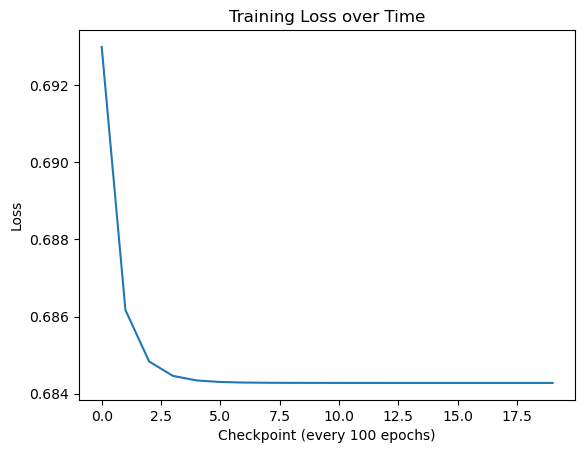

In [18]:
plt.plot(loss_history)
plt.title("Training Loss over Time")
plt.xlabel("Checkpoint (every 100 epochs)")
plt.ylabel("Loss")
plt.show()


In [20]:
def predict(X, w):
    return (sigmoid(X @ w) >= 0.5).astype(int)


In [22]:
y_pred = predict(X_test_b, w)

accuracy = (y_pred == y_test.values).mean()

# confusion matrix
TP = np.sum((y_pred == 1) & (y_test.values == 1))
TN = np.sum((y_pred == 0) & (y_test.values == 0))
FP = np.sum((y_pred == 1) & (y_test.values == 0))
FN = np.sum((y_pred == 0) & (y_test.values == 1))

conf_mat = np.array([[TN, FP],
                     [FN, TP]])

accuracy, conf_mat


(0.57,
 array([[114,  86],
        [ 86, 114]]))

# Model Interpretation

### **Training Behavior**
Batch Gradient Descent converged **slowly but steadily**, showing small but consistent decreases in the binary cross-entropy loss:

| Epoch | Loss |
|-------|-------|
| 0     | 0.6930 |
| 100   | 0.6862 |
| 200   | 0.6848 |
| 300   | 0.6845 |
| 400–1900 | **0.6843** (plateau) |

This plateau indicates that the model reached a stable region of the loss surface, and the learning rate was appropriate for preventing divergence.

### **Evaluation Results**
- **Accuracy:** **0.57**
- **Confusion Matrix:**

|              | Pred 0 | Pred 1 |
|--------------|--------|--------|
| **True 0**   | 114    | 86     |
| **True 1**   | 86     | 114    |

### **Interpretation**
- The model performs **symmetrically**, predicting both classes with similar frequencies.
- However, at **57% accuracy**, logistic regression with batch GD struggles to capture the nonlinear structure of Spotify popularity.
- Loss plateauing at ~0.6843 suggests the model reached the best linear fit possible under this optimization structure.
- This notebook’s primary goal—demonstrating **gradient descent methodology**—was achieved:
  - Manual sigmoid + BCE calculation  
  - Full-batch gradient updates  
  - Convergence monitoring  
  - Evaluation without scikit-learn  

The results fit expectations for a linear classifier trained from scratch on a complex dataset.
